In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [2]:
df = pd.read_csv("../input/spaceship-titanic/train.csv")
test = pd.read_csv("../input/spaceship-titanic/test.csv")

In [3]:
import seaborn as sns

In [4]:
sns.set_style("whitegrid")

In [5]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [6]:
df["NumGroups"] = df["PassengerId"].str[5 : ]
test["NumGroups"] = test["PassengerId"].str[5 : ]

In [7]:
df["GroupNumber"] = df["PassengerId"].str[ : 4]
test["GroupNumber"] = test["PassengerId"].str[ : 4]

In [8]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,NumGroups,GroupNumber
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,01,0001
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,01,0002
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,01,0003
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,02,0003
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,01,0004


<AxesSubplot:xlabel='HomePlanet', ylabel='Age'>

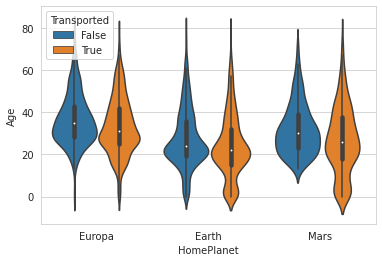

In [9]:
sns.violinplot(data = df, y = "Age", x = "HomePlanet", hue = "Transported")

<AxesSubplot:xlabel='Age', ylabel='Count'>

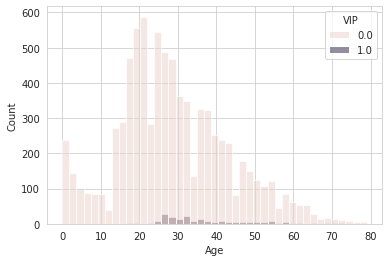

In [10]:
sns.histplot(data = df, x = "Age", hue = "VIP")

<AxesSubplot:xlabel='Transported', ylabel='Age'>

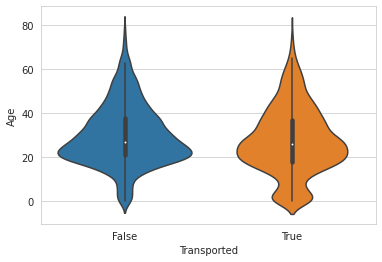

In [11]:
sns.violinplot(data = df, x = "Transported", y = "Age")

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
 14  NumGroups     8693 non-null   object 
 15  GroupNumber   8693 non-null   object 
dtypes: bool(1), float64(6), object(9)
memory usage: 1.0+ MB


In [13]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,NumGroups,GroupNumber
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,01,0001
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,01,0002
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,01,0003
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,02,0003
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,01,0004


In [14]:
df["Destination"].value_counts()

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

<AxesSubplot:>

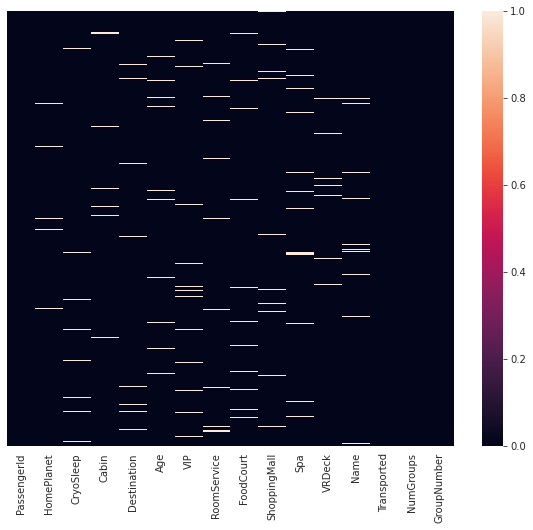

In [15]:
plt.figure(figsize = (10, 8))
sns.heatmap(data = df.isnull(), yticklabels = False)

<AxesSubplot:xlabel='Transported', ylabel='count'>

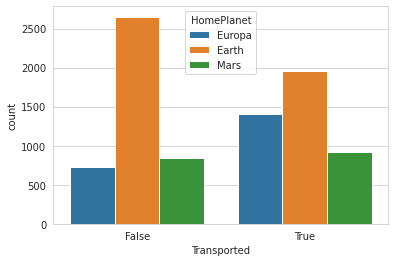

In [16]:
sns.countplot(x = "Transported" , data = df, hue = "HomePlanet")

<AxesSubplot:xlabel='Transported', ylabel='count'>

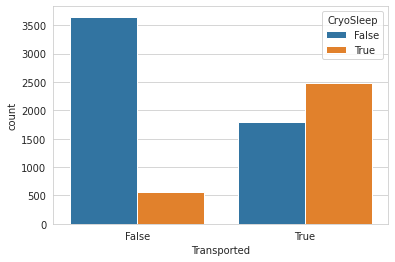

In [17]:
sns.countplot(x = "Transported" , data = df, hue = "CryoSleep")

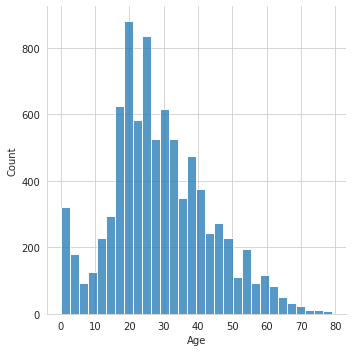

In [18]:
sns.displot(data = df["Age"], bins = 30)

<AxesSubplot:xlabel='NumGroups', ylabel='count'>

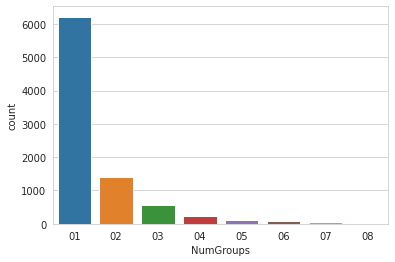

In [19]:
sns.countplot(x = "NumGroups", data = df)

In [20]:
df["TotalSum"] = df["RoomService"] + df["FoodCourt"] + df["ShoppingMall"] + df["Spa"] + df["VRDeck"]

In [21]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,NumGroups,GroupNumber,TotalSum
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,01,0001,0.0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,01,0002,736.0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,01,0003,10383.0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,02,0003,5176.0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,01,0004,1091.0


<AxesSubplot:xlabel='Age', ylabel='TotalSum'>

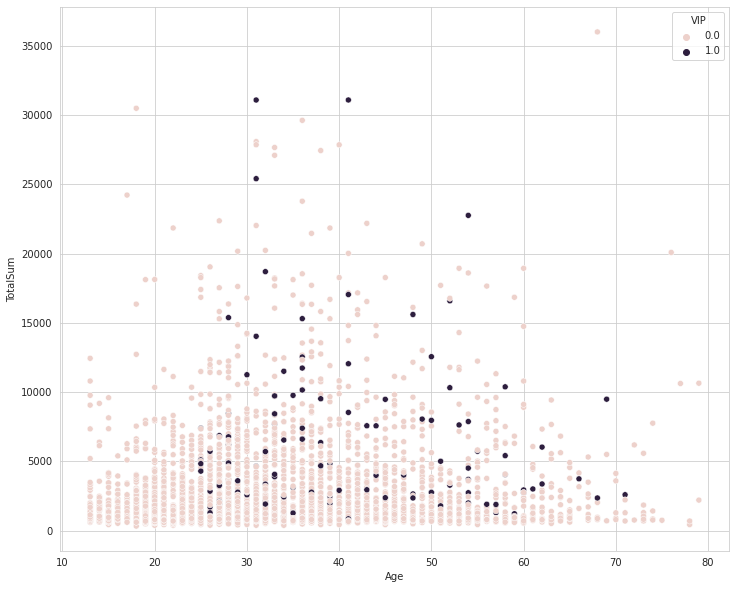

In [22]:
plt.figure(figsize = (12, 10))
sns.scatterplot(data = df[df["TotalSum"] > 0], x = "Age", y = "TotalSum", hue = "VIP")

In [23]:
df[pd.isnull(df["Age"])]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,NumGroups,GroupNumber,TotalSum
50,0052_01,Earth,False,G/6/S,TRAPPIST-1e,NaN,False,4.0,0.0,2.0,4683.0,0.0,Elaney Hubbarton,False,01,0052,4689.0
64,0068_01,Mars,False,E/4/S,TRAPPIST-1e,NaN,False,793.0,0.0,2.0,253.0,0.0,Cinst Binie,False,01,0068,1048.0
137,0149_01,Earth,True,G/27/S,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Billya Hubbarrison,True,01,0149,0.0
181,0202_02,Europa,False,A/2/P,55 Cancri e,NaN,False,0.0,2433.0,NaN,878.0,443.0,Vegas Embleng,True,02,0202,NaN
184,0206_01,Europa,False,C/9/S,55 Cancri e,NaN,False,2.0,1720.0,12.0,1125.0,122.0,Nuson Brugashed,True,01,0206,2981.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8274,8835_01,Earth,True,G/1425/S,TRAPPIST-1e,NaN,False,0.0,0.0,0.0,0.0,0.0,Shalle Bartines,False,01,8835,0.0
8301,8862_03,Europa,True,C/329/S,TRAPPIST-1e,NaN,False,0.0,0.0,0.0,0.0,0.0,Alchib Myling,True,03,8862,0.0
8374,8956_04,Earth,False,G/1453/P,TRAPPIST-1e,NaN,False,194.0,1.0,10.0,629.0,0.0,Krisa Bonnondry,False,04,8956,834.0
8407,8988_01,Earth,True,G/1448/S,TRAPPIST-1e,NaN,False,0.0,0.0,0.0,0.0,0.0,Maen Fowlesterez,True,01,8988,0.0


<AxesSubplot:xlabel='Age', ylabel='count'>

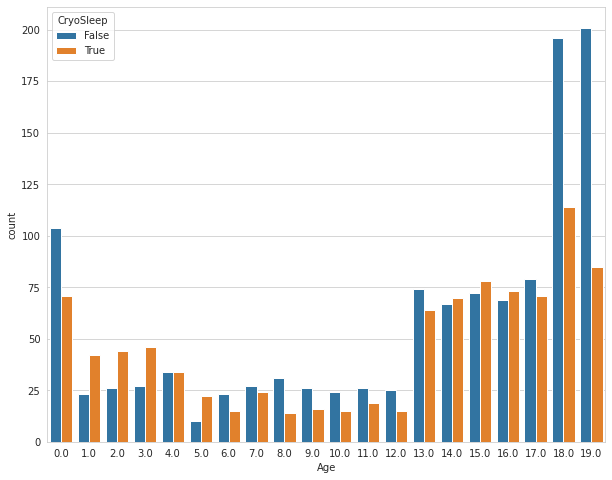

In [24]:
plt.figure(figsize = (10, 8))
sns.countplot(x = "Age", data = df[df["Age"] < 20], hue = "CryoSleep")

In [25]:
df["Age"].mean()

28.82793046746535

In [26]:
def impute_age(age): 
    if(pd.isnull(age)):
        return 29
    else:
        return age    

In [27]:
df["Age"] = df["Age"].apply(impute_age)
test["Age"] = test["Age"].apply(impute_age)

<AxesSubplot:>

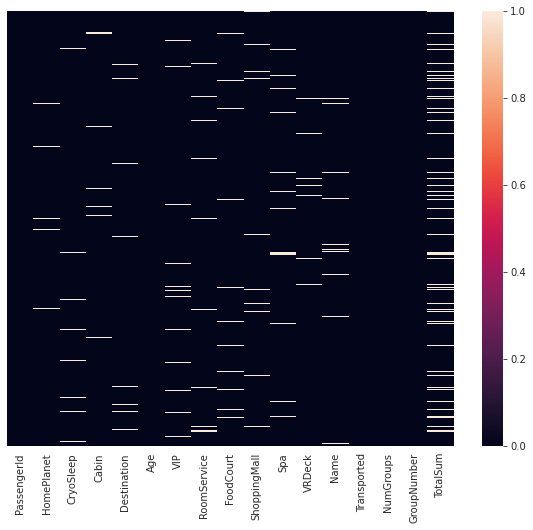

In [28]:
plt.figure(figsize = (10, 8))
sns.heatmap(data = df.isnull(), yticklabels = False)

In [29]:
destination = pd.get_dummies(df["Destination"], drop_first = True)

In [30]:
home_planet = pd.get_dummies(df["HomePlanet"], drop_first = True)

In [31]:
df = pd.concat([df, destination, home_planet], axis = 1)

In [32]:
destination = pd.get_dummies(test["Destination"], drop_first = True)
home_planet = pd.get_dummies(test["HomePlanet"], drop_first = True)
test = pd.concat([test, destination, home_planet], axis = 1)

In [33]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,VRDeck,Name,Transported,NumGroups,GroupNumber,TotalSum,PSO J318.5-22,TRAPPIST-1e,Europa,Mars
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,...,0.0,Maham Ofracculy,False,01,0001,0.0,0,1,1,0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,...,44.0,Juanna Vines,True,01,0002,736.0,0,1,0,0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,...,49.0,Altark Susent,False,01,0003,10383.0,0,1,1,0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,...,193.0,Solam Susent,False,02,0003,5176.0,0,1,1,0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,...,2.0,Willy Santantines,True,01,0004,1091.0,0,1,0,0


In [34]:
df.drop(["HomePlanet", "Name", "Cabin", "TotalSum", "Destination", "PassengerId"], axis = 1, inplace = True)

In [35]:
test.drop(["HomePlanet", "Name", "Cabin","Destination", "PassengerId"], axis = 1, inplace = True)

<AxesSubplot:>

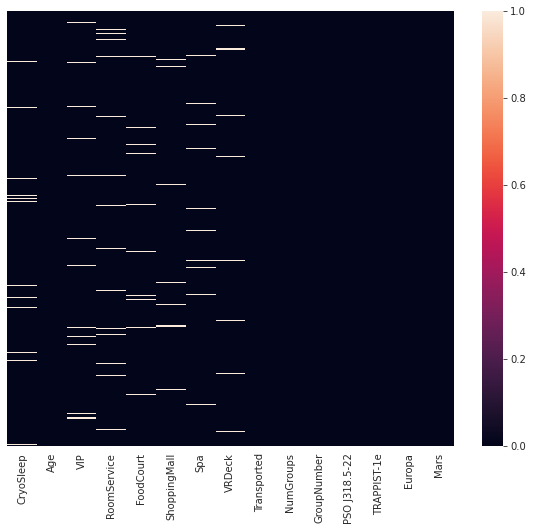

In [36]:
plt.figure(figsize = (10, 8))
sns.heatmap(data = df.isnull(), yticklabels = False)

In [37]:
df.fillna(value = {"CryoSleep" : False, "VIP" : False, "RoomService" : 0.0, "FoodCourt" : 0, "ShoppingMall" : 0, "VRDeck" : 0, "Spa" : 0}, inplace = True)
test.fillna(value = {"CryoSleep" : False, "VIP" : False, "RoomService" : 0.0, "FoodCourt" : 0, "ShoppingMall" : 0, "VRDeck" : 0, "Spa" : 0}, inplace = True)

<AxesSubplot:>

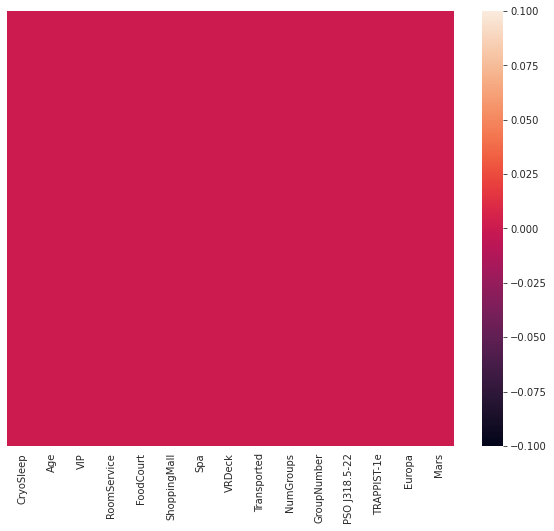

In [38]:
plt.figure(figsize = (10, 8))
sns.heatmap(data = df.isnull(), yticklabels = False)

In [39]:
df.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,NumGroups,GroupNumber,PSO J318.5-22,TRAPPIST-1e,Europa,Mars
0,False,39.0,False,0.0,0.0,0.0,0.0,0.0,False,01,0001,0,1,1,0
1,False,24.0,False,109.0,9.0,25.0,549.0,44.0,True,01,0002,0,1,0,0
2,False,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,01,0003,0,1,1,0
3,False,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,02,0003,0,1,1,0
4,False,16.0,False,303.0,70.0,151.0,565.0,2.0,True,01,0004,0,1,0,0


In [40]:
test.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,NumGroups,GroupNumber,PSO J318.5-22,TRAPPIST-1e,Europa,Mars
0,True,27.0,False,0.0,0.0,0.0,0.0,0.0,01,0013,0,1,0,0
1,False,19.0,False,0.0,9.0,0.0,2823.0,0.0,01,0018,0,1,0,0
2,True,31.0,False,0.0,0.0,0.0,0.0,0.0,01,0019,0,0,1,0
3,False,38.0,False,0.0,6652.0,0.0,181.0,585.0,01,0021,0,1,1,0
4,False,20.0,False,10.0,0.0,635.0,0.0,0.0,01,0023,0,1,0,0


In [41]:
X_train = df.drop("Transported", axis = 1)
y_train = df["Transported"]

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
logmodel = LogisticRegression(max_iter = 1000)

In [44]:
logmodel.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [45]:
predictions = logmodel.predict(test)

In [46]:
predictions = pd.DataFrame(predictions)

In [47]:
predictions = predictions[0].rename("Transported")

In [48]:
predictions = pd.DataFrame(predictions)

In [49]:
 predictions["PassengerId"] = test["GroupNumber"] + "_" + test["NumGroups"].apply(str)

In [50]:
predictions = predictions[["PassengerId", "Transported"]]

In [51]:
predictions.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False


In [52]:
predictions.to_csv("res.csv", index = False)